## Review
### This recitation (11.15) covers following lecture below:
- **11.8 (Wed)**
- **11.13 (Mon)**

In [ ]:
import numpy as np

### Bag of Words (BoW)
Bag of Words is a numerical expression method of text data that focuses only on the frequency of occurrence of words without considering the order of words at all.


*   Give each word its own integer index. (Create a word set.)
*   Create a vector that records the number of appearances of word tokens at the location of each index.



In [ ]:
def get_bag_of_words(doc, vocab):
   # Create initial dictionary which maps each vocabulary word to a count of 0
   word_count_dict = dict.fromkeys(vocab, 0)

   for word in doc:
       word_count_dict[word] += 1

   bag = [0] * len(vocab)

   for i, word in enumerate(vocab):
       bag[i] = word_count_dict[word]

   return bag

In [ ]:
import re

vocab = ['a', 'am', 'and', 'anywhere', 'are', 'be', 'boat', 'box', 'car',\
        'could', 'dark', 'do', 'eat', 'eggs', 'fox', 'goat', 'good', 'green',\
        'ham', 'here', 'house', 'i', 'if', 'in', 'let', 'like', 'may', 'me',\
        'mouse', 'not', 'on', 'or', 'rain', 'sam', 'say', 'see', 'so', 'thank',\
        'that', 'the', 'them', 'there', 'they', 'train', 'tree', 'try', 'will',\
        'with', 'would', 'you']
doc = ("I would not like them here or there.\n"
      "I would not like them anywhere.\n"
      "I do not like green eggs and ham.\n"
      "I do not like them, Sam-I-am.")

doc = doc.lower()
doc = re.split("\W", doc)
doc = [s for s in doc if len(s) > 0]
bag_of_words = get_bag_of_words(doc, vocab)

print(bag_of_words)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 5, 0, 0, 0, 4, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 2, 0]


### Document-Term Matrix (DMT)
DMT is a matrix representation of the frequency of each word appearing in a number of documents.

You can think of the BoW for each document as a single matrix, and it is not a different way of expression than the BoW, but a term that expresses and calls the BoW representation as a matrix for a number of documents.

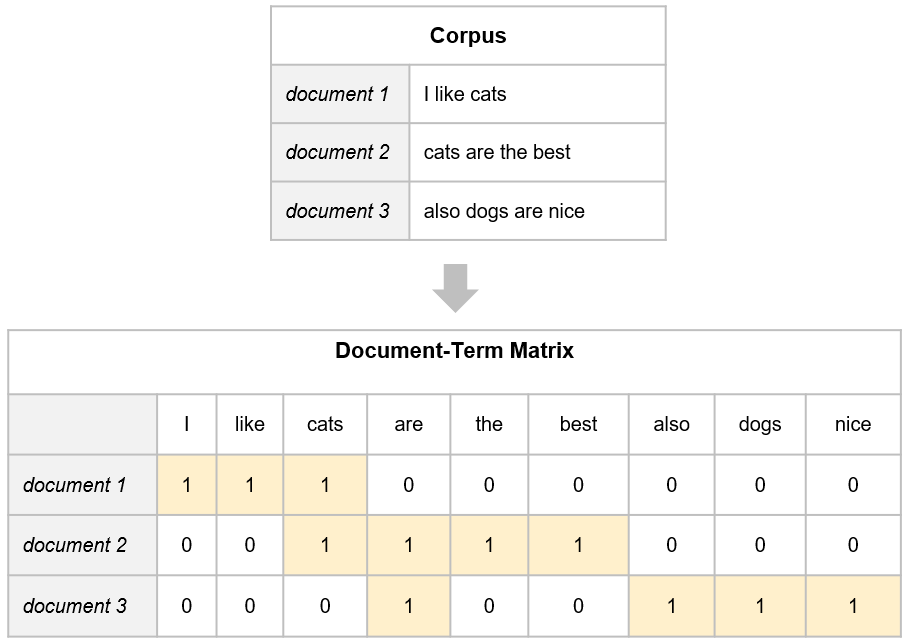

### Term Frequency-Inverse Document Frequency (TF-IDF)

Term Frequency: TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.

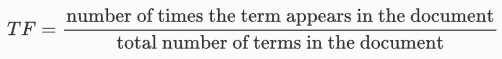

Inverse Document Frequency: IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

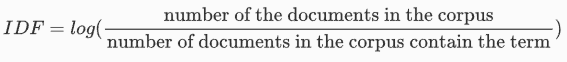

The TF-IDF of a term is calculated by multiplying TF and IDF scores.

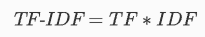

#### Numerical example
Imagine the term t appears 20 times in a document that contains a total of 100 words. Term Frequency (TF) of t can be calculated as follow:

$$
\begin{aligned}
& TF = \frac{20}{100} = 0.2  \\
\end{aligned}
$$

Assume a collection of related documents contains 10,000 documents. If 100 documents out of 10,000 documents contain the term t, Inverse Document Frequency (IDF) of t can be calculated as follows:

$$
\begin{aligned}
& IDF = log\frac{10000}{100} = 2  \\
\end{aligned}
$$

Using these two quantities, we can calculate TF-IDF score of the term t for the document.

$$
\begin{aligned}
& TFIDF = 0.2*2 = 0.4  \\
\end{aligned}
$$

#### Implementation

In [ ]:
import pandas as pd

corpus = ['data science is one of the most important fields of science',
          'this is one of the best data science courses',
          'data scientists analyze data' ]

words_set = set()

for doc in  corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

Computing Term Frequency

Now we can create a dataframe by the number of documents in the corpus and the word set, and use that information to compute the term frequency (TF):

In [ ]:
n_docs = len(corpus)         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns = list(words_set))

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        # 'ppp' exercise
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))

df_tf

Computing Inverse Document Frequency

Now, we'll compute the inverse document frequency (IDF):

In [ ]:
print("IDF of: ")

idf = {}

for w in words_set:
    k = 0    # number of documents in the corpus that contain this word

    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1

    # 'ppp' exercise
    idf[w] =  np.log10(n_docs / k)

    print(f'{w:>15}: {idf[w]:>10}' )

Putting it Together: Computing TF-IDF

Since we have TF and IDF now, we can compute TF-IDF:

In [ ]:
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]

df_tf_idf

### Similarities


*   Cosine Similarity
*   Euclidean Distance
*   Jaccard Similarity



#### Cosine Similarity


*   Cosine similarity is a measure of how similar two vectors are by calculating the angles between them.
*   The cosine similarity is interpreted as similar when the two vectors are closer to 1 and has the advantage of being able to compare relatively fairly even when the document is different in length.

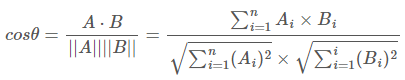

#### Euclidean Distance


*   The closer the Euclidean distance between documents, the more similar they are.
*   Unlike cosine similarity, Euclidean distance has a limitation that it is affected by the length between documents being compared.

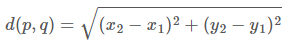


In [ ]:
def euclidean_distance(A, B):
    # 'ppp' exercise
    return np.sqrt(np.sum((A-B)**2))

#### Jaccard Similarity


*   Jaccard Similarity is the proportion of intersections of two sets when there are two sets A and B.
*   This means that the jacquard similarity is 1 when the two sets are exactly the same, and 0 when the two sets do not have intersections.
*   When J is the jacquard similarity, the jacquard similarity formula between two sets is as follows:

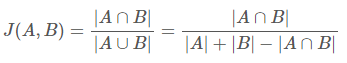

*    If two documents were given, the similarity can be calculated as follows:

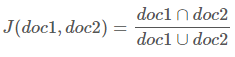

In [ ]:
doc1 = "The fat cat sat on the mat"
doc2 = "The lovely dog slept on the table"

doc1_tokenized = doc1.split()
doc2_tokenized = doc2.split()

# Combination Calculation
doc_union = set(doc1_tokenized).union(set(doc2_tokenized))

# Intersection calculation
doc_intersection = set(doc1_tokenized).intersection(set(doc2_tokenized))

# Jaccard Similarity
jaccard_similarity = len(doc_intersection) / len(doc_union)

print(jaccard_similarity)

### Word embedding

*   LSA
*   Word2Ved
*   FastText
*   Glove


### Word2Vec
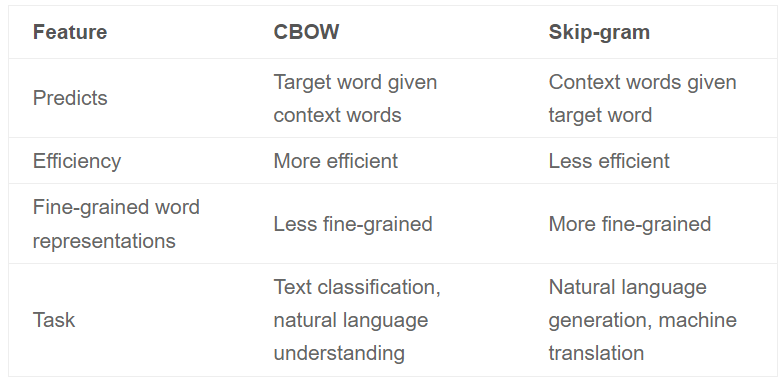

#### Continous Bag of Words (CBOW)


*   CBOW model predicts the current word given context words within a specific window.
*   The input layer contains the context words and the output layer contains the current word.
*   The hidden layer contains the number of dimensions in which we want to represent the current word present at the output layer.

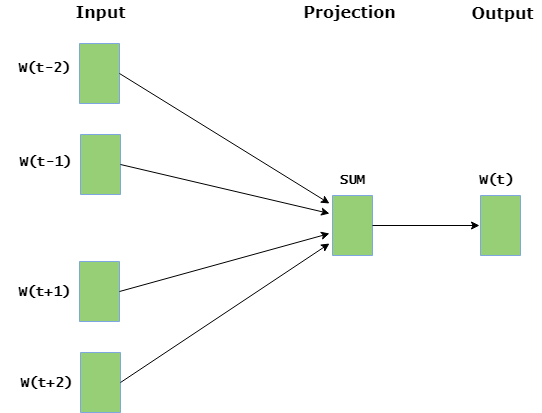

#### Skip Gram


*   Skip gram predicts the surrounding context words.
*   The input layer contains the current word and the output layer contains the context words.
*   The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.

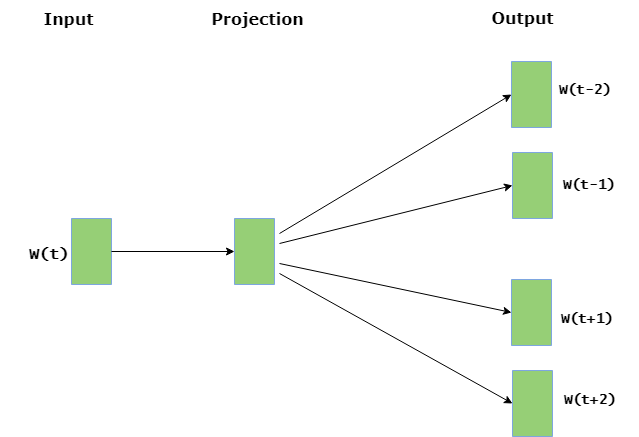

### Latent Semantic Analysis (LSA)


*   DTM or TF-IDF based on BoW had the disadvantage of not considering the meaning of words because it is basically a quantification method using the frequency of words.
*   An alternative to this is a method LSA to derive the latent meaning of the DTM.
*   LSA has the idea of using truncated SVD for DTM or TF-IDF matrices to reduce the dimensions and draw potential meaning from words



#### Singular Value Decomposition (SVD)


*   SVD refers to decomposition when A is an m × n matrix into the product of three matrices as follows:

$$
\begin{aligned}
& A = UΣV^T  \\
& U: m×m \ orthogonal \ matrix  \\
& V: n×n \ orthogonal \ matrix  \\
& Σ: m×n \ diagonal \ matrix  \\
\end{aligned}
$$




#### Truncated SVD


*   The SVD described above is referred to as full SVD.
*   In the case of LSA, we use truncated SVD, which removes some vectors from the three matrices from the full SVD.

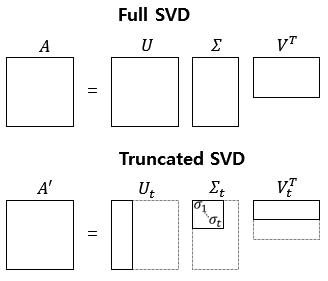
*   The truncated SVD leaves only the upper-value t of the diagonal elements in the diagonal matrix Σ.
*   Here, t is a hyperparameter value that reflects the number of topics we are looking for.
*   If you hold t large, you can take various meanings from the existing matrix A, but if you hold t small, you can remove noise.

#### Implementation

In [ ]:
from scipy.linalg import svd

In [ ]:
titles = ["The Neatest Little Guide to Stock Market Investing",
		"Investing For Dummies, 4th Edition",
		"The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns",
		"The Little Book of Value Investing",
		"Value Investing: From Graham to Buffett and Beyond",
		"Rich Dad's Guide to Investing: What the Rich Invest in, That the Poor and the Middle Class Do Not!",
		"Investing in Real Estate, 5th Edition",
		"Stock Investing For Dummies",
		"Rich Dad's Advisors: The ABC's of Real Estate Investing: The Secrets of Finding Hidden Profits Most Investors Miss"
		]

stopwords = ['and','edition','for','in','little','of','the','to']
ignorechars = ''',:'!'''

In [ ]:
class LSA(object):
    def __init__(self, stopwords, ignorechars):
        self.stopwords = stopwords
        self.ignorechars = ignorechars
        self.wdict = {}
        self.dcount = 0

    def parse(self, doc):
        words = doc.split()
        for w in words:
            w = w.lower().translate(self.ignorechars)
            if w in self.stopwords:
                continue
            elif w in self.wdict:
                self.wdict[w].append(self.dcount)
            else:
                self.wdict[w] = [self.dcount]
        self.dcount += 1

    # rows -> keywords (occur more than twice), cols -> documentID
    def build(self):
        self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 1]
        self.keys.sort()
        self.A = np.zeros([len(self.keys), self.dcount])
        for i, k in enumerate(self.keys):
            for d in self.wdict[k]:
                self.A[i,d] += 1

    def calc(self):
        self.U, self.S, self.Vt = svd(self.A)

    def TFIDF(self):
        WordsPerDoc = np.sum(self.A, axis=0)
        DocsPerWord = np.sum(np.asarray(self.A > 0, 'i'), axis=1)
        rows, cols = self.A.shape
        for i in range(rows):
            for j in range(cols):
                self.A[i,j] = (self.A[i,j] / WordsPerDoc[j]) * np.log(float(cols) / DocsPerWord[i])

    def printA(self):
        print('Here is the count matrix')
        print(self.A)

    def printSVD(self):
        print('Here are the singular values')
        print(self.S)
        print('Here are the first 3 columns of the U matrix')
        print(-1*self.U[:, 0:3])
        print('Here are the first 3 rows of the Vt matrix')
        print(-1*self.Vt[0:3, :])

    def TFIDF(self):
        WordsPerDoc = np.sum(self.A, axis=0)
        DocsPerWord = np.sum(np.asarray(self.A > 0, 'i'), axis=1)
        rows, cols = self.A.shape
        for i in range(rows):
            for j in range(cols):
                self.A[i,j] = (self.A[i,j] / WordsPerDoc[j]) * np.log(float(cols) / DocsPerWord[i])

In [ ]:
mylsa = LSA(stopwords, ignorechars)
for t in titles:
    mylsa.parse(t)
mylsa.build()
mylsa.printA()
mylsa.calc()
mylsa.printSVD()